In [ ]:
import numpy as np
import pyfftw as pfft
import cupy as cp

from IO import cfl
from FFT import fft
from util import process_3d
from util import phase_3d
from scipy import sparse
from scipy import optimize

from NUFFT import nufft
from util import imshow_3d

In [1]:
import SimpleITK as sitk
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
imgf = sitk.ReadImage('/raid/xucheng/cupy_test/scans/06_Fixed.mhd')
imgf = sitk.GetArrayFromImage(imgf).astype(np.float)
imgm = sitk.ReadImage('/raid/xucheng/cupy_test/scans/06_Moving.mhd')
imgm = sitk.GetArrayFromImage(imgm).astype(np.float)
imgf = (imgf[:,:,1:-1]-imgf.min())/(imgf.max()-imgf.min())
imgm = (imgm[:-1,:,:]-imgm.min())/(imgm.max()-imgm.min())

In [3]:

print(imgf.shape,imgm.shape)

(168, 318, 428) (168, 318, 428)


<IPython.core.display.Javascript object>


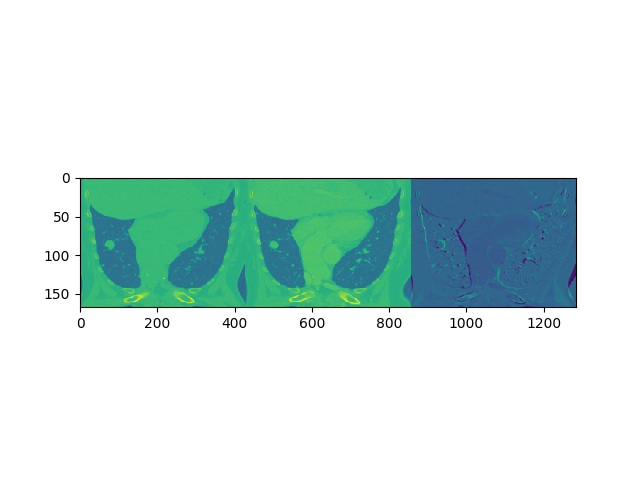

In [10]:
plt.figure(1)
plt.imshow(np.hstack((imgm[:,100,:],imgf[:,100,:],imgm[:,100,:] - imgf[:,100,:])),aspect=2.0)

In [11]:
imgft = ndimage.gaussian_filter(ndimage.zoom(imgf,1),sigma=1)
imgmt = ndimage.gaussian_filter(ndimage.zoom(imgm,1),sigma=1)

In [12]:
imgftg = np.asarray([ndimage.sobel(imgft,axis=0),ndimage.sobel(imgft,axis=1),ndimage.sobel(imgft,axis=2)])
imgmtg = np.asarray([ndimage.sobel(imgmt,axis=0),ndimage.sobel(imgmt,axis=1),ndimage.sobel(imgmt,axis=2)])


In [13]:
Field = (imgft[None,...]*imgmtg-imgmt[None,...]*imgftg)/((imgft[None,...]+imgmt[None,...])**2/4)/8.0
Field = Field+(imgft[None,...]*imgftg)/(imgft[None,...]**2)-(imgmt[None,...]*imgmtg)/(imgmt[None,...]**2)/8.0
Field = 2*Field/(Field**2 + 1e1)

<IPython.core.display.Javascript object>


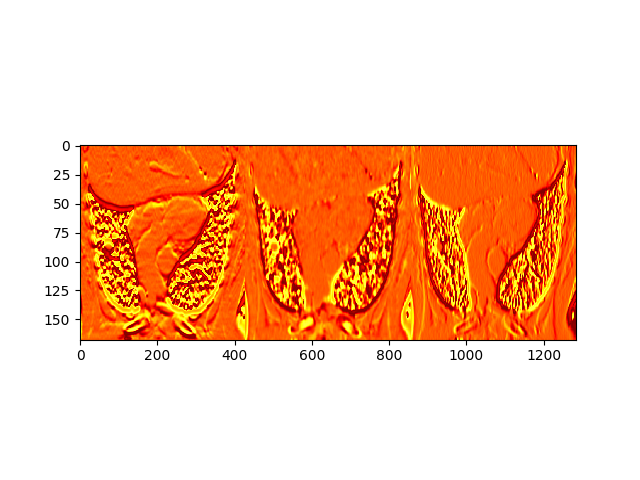

In [15]:
plt.figure(2)
plt.imshow(np.hstack((Field[0,:,100,:],Field[1,:,100,:],Field[2,:,100,:])),aspect=3.0,vmin =-.5,vmax =.5,cmap='hot')

In [ ]:
import cupy as cp
from cupyx.scipy.ndimage.interpolation import map_coordinates

In [ ]:
a = cp.arange(int(8e6)).reshape((200, 200,200)) + 1j*cp.arange(int(8e6)).reshape((200, 200,200))
b = cp.random.rand(3,int(8e6))
c = map_coordinates(a, b, order=1)

In [ ]:
c

In [ ]:
traj = cfl.readcfl('../../data/UWUTE_Vo_traj')
dcf = cfl.readcfl('../../data/UWUTE_Vo_dcf')
data = cfl.readcfl('../../data/UWUTE_Vo_data')

In [ ]:
NFT = nufft.NUFFT3D(np.real(traj),pattern = dcf,seg = 200000)
img1 = NFT.adjoint(data)

In [ ]:
traj = cfl.readcfl(name='GPI_traj')
data = cfl.readcfl(name='cGPI_data')
pattern = cfl.readcfl(name='GPI_dcf')
NFT = nufft_gpu.NUFFT3D(np.real(traj),pattern = pattern)
img = NFT.adjoint(data)


In [ ]:
img = cfl.readcfl('trash0')

In [ ]:
img0 = np.sqrt(np.sum(np.abs(img1**2),axis=3))
imshow_3d.imshow3d(np.abs(img0[:,:,30]))

In [ ]:
cfl.writecfl('trash0',img)

In [ ]:
a = cp.zeros([6,3,2],dtype=cp.float32)
b = cp.ones([1,3],dtype=cp.int32)
c = cp.array([[4,2,3],[4,5,6],[7,8,9]])
a+b

In [ ]:
from FFT import fft
a = np.random.randn(3,3,3)
A = fft.fft(shape=1,axes=(0,1,2))
b = A.FT(np.conj(A.IFT(a)))
print(a,b)